# 1. Install and Import Dependencies

In [1]:
%pip install torch==1.10.2+cu102 torchvision==0.11.3+cu102 torchaudio===0.10.2+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\NickH\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!git clone https://gist.github.com/7d1fe28dd370e110a372c4d268dcb2e5.git

In [28]:
!python fixNvPe.py --input C:\Users\NickH\anaconda3\Lib\site-packages\torch\lib*.dll



Done!


In [ ]:
%pip install pefile

In [ ]:
%pip install matplotlib

In [ ]:
%pip install requests --user

In [ ]:
%pip install pandas

In [ ]:
%pip install opencv-python

In [ ]:
%pip install pyyaml

In [ ]:
%pip install tqdm

In [ ]:
%pip install --upgrade pip

In [ ]:
%pip install seaborn

In [ ]:
%pip install tensorflow --upgrade

In [ ]:
%pip install ipywidgets

In [2]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


# 2. Load Model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\NickH/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-8 torch 1.10.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, force_reload=True)

In [ ]:
model

# 3. Make Detections with Images

In [10]:
img = 'https://insideclimatenews.org/wp-content/uploads/2021/12/PlasticPollution-2048x1011.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 1011x2048 3 plastics
Speed: 2672.2ms pre-process, 232.0ms inference, 16.0ms NMS per image at shape (1, 3, 320, 640)


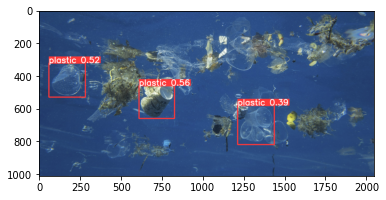

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# 4. Real Time Detections

In [4]:
cap = cv2.VideoCapture('Plastic.mp4')
#For web cam
#cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [5]:
cap = cv2.VideoCapture('Plastic.mp4')
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

NameError: name 'labels' is not defined

In [32]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 15 --data data.yaml --weights yolov5s.pt 

Traceback (most recent call last):
  File "train.py", line 26, in <module>
    import torch
  File "C:\Users\NickH\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\__init__.py", line 124, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\Users\NickH\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.


In [15]:
!tensorboard --logdir runs\train

^C


# 6. Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:\YOLO-Plastic-Detection\yolov5\data\last (2).pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\NickH/.cache\torch\hub\master.zip
C:\Users\NickH\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\NickH\AppData\Local\Programs\Python\Python38\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")
YOLOv5  2022-5-3 torch 1.10.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()